In [1]:
import pandas as pd 
import numpy as np
import tejapi
tejapi.ApiConfig.api_key = 'your key'
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt

In [40]:
stk_num = '0050'
stk_data = tejapi.get('TWN/EWPRCD',coid = stk_num,paginate = True
                      ,opts= {'columns':['coid','mdate','open_d','high_d','low_d','close_d']}) #未調整股價
stk_adj = tejapi.get('TWN/EWPRCD',coid = stk_num,paginate = True
                    ,opts= {'columns':['coid','mdate','open_adj','high_adj','low_adj','close_adj']}) #調整後股價
yf_data = pdr.DataReader(stk_num+'.tw','yahoo') # Yahoo Finance股價

In [41]:
stk_data.tail()

,coid,mdate,open_d,high_d,low_d,close_d
None,,,,,,
1268,0050,2021-03-17 00:00:00+00:00,135.35,135.40,134.0,134.2
1269,0050,2021-03-18 00:00:00+00:00,135.10,136.05,134.8,134.9
1270,0050,2021-03-19 00:00:00+00:00,133.45,133.50,132.3,132.8
1271,0050,2021-03-22 00:00:00+00:00,132.40,133.60,131.6,133.4
1272,0050,2021-03-23 00:00:00+00:00,133.90,134.70,133.6,133.6


In [42]:
stk_adj.tail()

,coid,mdate,open_adj,high_adj,low_adj,close_adj
None,,,,,,
1268,0050,2021-03-17 00:00:00+00:00,135.35,135.40,134.0,134.2
1269,0050,2021-03-18 00:00:00+00:00,135.10,136.05,134.8,134.9
1270,0050,2021-03-19 00:00:00+00:00,133.45,133.50,132.3,132.8
1271,0050,2021-03-22 00:00:00+00:00,132.40,133.60,131.6,133.4
1272,0050,2021-03-23 00:00:00+00:00,133.90,134.70,133.6,133.6


In [43]:
yf_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-17,135.399994,134.000000,135.350006,134.199997,6645656.0,134.199997
2021-03-18,136.050003,134.800003,135.100006,134.899994,6904704.0,134.899994
2021-03-19,133.500000,132.300003,133.449997,132.800003,9925322.0,132.800003
2021-03-22,133.600006,131.600006,132.399994,133.399994,5306034.0,133.399994
2021-03-24,132.350006,131.500000,131.800003,132.250000,2419125.0,132.250000


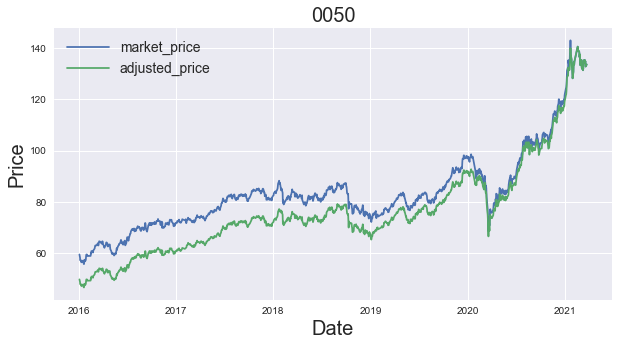

In [44]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.title('0050',fontsize = 20)
l1 = plt.plot(stk_data.mdate,stk_data.close_d,label = 'market_price')
l2 = plt.plot(stk_adj.mdate,stk_adj.close_adj,label = 'adjusted_price')
params = {'legend.fontsize': 14,
          'legend.handlelength': 3,
         'axes.labelsize': 25}
plt.rcParams.update(params)
plt.legend(loc="upper left")
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [45]:
# 調整後和未調整股價 報酬率差異
buy_cost_mp, buy_cost_adj = stk_data.close_d.values[0], stk_adj.close_adj.values[0]
sell_price_mp, sell_price_adj = stk_data.close_d.values[-1], stk_adj.close_adj.values[-1]
return_mp, return_adj = ((sell_price_mp-buy_cost_mp)/buy_cost_mp), ((sell_price_adj-buy_cost_adj)/buy_cost_adj)
print("未調整股價報酬率:",return_mp,"調整股價報酬率:", return_adj)

未調整股價報酬率: 1.2434928631402182 調整股價報酬率: 1.680228300883713


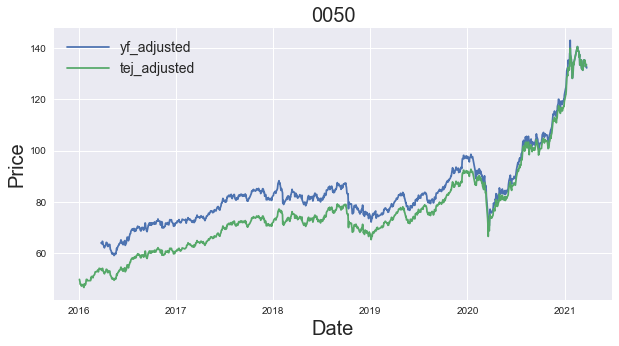

In [46]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.title('0050',fontsize = 20)
l1 = plt.plot(yf_data.index,yf_data['Adj Close'],label = 'yf_adjusted')
l2 = plt.plot(stk_adj.mdate,stk_adj.close_adj,label = 'tej_adjusted')
params = {'legend.fontsize': 14,
          'legend.handlelength': 3,
         'axes.labelsize': 25}
plt.rcParams.update(params)
plt.legend(loc="upper left")
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [47]:
# yf調整後收盤和 tej調整後收盤 報酬率差異
buy_cost_yf, buy_cost_adj = yf_data['Adj Close'].values[0], stk_adj.close_adj.values[0]
sell_price_yf, sell_price_adj = yf_data['Adj Close'].values[-1], stk_adj.close_adj.values[-1]
return_yf, return_adj = (sell_price_yf-buy_cost_yf)/buy_cost_yf, (sell_price_adj-buy_cost_adj)/buy_cost_adj
return_yf, return_adj
print("yf調整後收盤報酬率:",return_yf,"tej調整後收盤報酬率:", return_adj)

yf調整後收盤報酬率: 1.0647930319867562 tej調整後收盤報酬率: 1.680228300883713


In [11]:
# 結果來看
# 若單以價格，不考慮股利發放來衡量報酬率，會出現相當大的誤差，而經過除權息調整後的股價所得出來的報酬率同時也考慮了除權息的部分。
# 而自行查詢每年的股票殖利率並加回，確實不失為一個方法，但要做的工就更多了，因此建議利用調整後股價來計算報酬率才能避免實際報酬失真的情形~
# 若是所選標的沒有定期發放股利的習慣，那未調整股價和調整後股價所計算出之報酬率就幾無差異，但同時也多了去查詢過往股利發放紀錄的步驟，因此還是建議計算報酬率時一律使用調整後股價喔!!

In [34]:
stk_info = pd.read_csv('TW50.csv',engine='python')
stk_name = stk_info['成份股'].apply(lambda x :x[5:]).tolist()
stk_info['stk_name'] = stk_name
stk_nums = stk_info['成份股'].apply(lambda x :x[:4]).tolist()
stk_info['coid'] = stk_nums
# 創建一個儲存結果的 dataframe
result = pd.DataFrame(columns=['stk_ID','stk_name','start_date_tej','end_date_tej','start_date_yf','end_date_yf','ret_tej','ret_yf','total_ret_tej'])
i=0
for stk_num in stk_nums:
    #stk_num = '0050'
    start = dt.datetime(2000,1,1)
    end = dt.datetime.now()
    stk_data = tejapi.get('TWN/APRCD',coid = stk_num,paginate = True,mdate={'gt':start}) #未調整股價
    stk_adj = tejapi.get('TWN/APRCD1',coid = stk_num,paginate = True,mdate={'gt':start}) #調整後股價
    stk_code = stk_num +'.TW'
    start = dt.datetime(2000,1,1)
    end = dt.datetime.now()
    yf_data = pdr.DataReader(stk_code,'yahoo',start,end)
    # 調整後和未調整股價 報酬率差異
    buy_cost_mp, buy_cost_adj = stk_data.close_d.values[0], stk_adj.close_adj.values[0]
    sell_price_mp, sell_price_adj = stk_data.close_d.values[-1], stk_adj.close_adj.values[-1]
    return_mp, return_adj = (sell_price_mp-buy_cost_mp)/buy_cost_mp, (sell_price_adj-buy_cost_adj)/buy_cost_adj
    # yf調整後收盤和tej調整後收盤 報酬率差異
    buy_cost_yf, buy_cost_adj = yf_data['Adj Close'].values[0], stk_adj.close_adj.values[0]
    sell_price_yf, sell_price_adj = yf_data['Adj Close'].values[-1], stk_adj.close_adj.values[-1]
    return_yf, return_adj = (sell_price_yf-buy_cost_yf)/buy_cost_yf, (sell_price_adj-buy_cost_adj)/buy_cost_adj
    return_yf, return_adj
    # 插入列
    #index_ = 
    result.loc[i,:] = stk_num, stk_info.stk_name[stk_info.coid==stk_num].values[0], stk_adj.mdate.tolist()[0], stk_adj.mdate.tolist()[-1],yf_data.index.tolist()[0],yf_data.index.tolist()[-1],return_adj,return_yf,return_mp
    i+=1
    print(stk_num)

1101
1102
1216
1301
1303
1326
1402
2002
2105
2207
2303
2308
2317
2327
2330
2357
2379
2382
2395
2408
2412
2454
2474
2633
2801
2880
2881
2882
2883
2884
2885
2886
2887
2890
2891
2892
2912
3008
3034
3045
3711
4904
4938
5871
5876
5880
6415
6505
6669
9910


In [35]:
# 計算 yf與 tej之報酬率差異
result['difference'] = abs((result.ret_yf-result.ret_tej)/result.ret_tej)

In [36]:
# 問題一 調整後股價所計算支持有報酬率，tej和yahoo finance在資料品質上有很大的差異
result.sort_values(by='difference',ascending=False).reset_index(drop=True)

,stk_ID,stk_name,start_date_tej,end_date_tej,start_date_yf,end_date_yf,ret_tej,ret_yf,total_ret_tej,difference
0,6669,緯穎,2019-03-27 00:00:00+00:00,2021-03-23 00:00:00+00:00,2017-11-13 00:00:00,2021-03-24 00:00:00,1.38613,7.28415,1.21693,4.25504
1,2883,開發金,2001-12-28 00:00:00+00:00,2021-03-23 00:00:00+00:00,2001-12-31 00:00:00,2021-03-24 00:00:00,0.152829,0.653827,-0.550661,3.27816
2,9910,豐泰,2000-01-04 00:00:00+00:00,2021-03-23 00:00:00+00:00,2000-01-04 00:00:00,2021-03-24 00:00:00,39.5883,164.292,3.91139,3.15002
3,2303,聯電,2000-01-04 00:00:00+00:00,2021-03-23 00:00:00+00:00,2000-01-04 00:00:00,2021-03-24 00:00:00,0.308565,0.914588,-0.590717,1.96401
4,3711,日月光投控,2018-04-30 00:00:00+00:00,2021-03-23 00:00:00+00:00,2000-01-04 00:00:00,2021-03-24 00:00:00,0.483875,1.41184,0.344956,1.91777
5,1402,遠東新,2000-01-04 00:00:00+00:00,2021-03-23 00:00:00+00:00,2000-01-04 00:00:00,2021-03-24 00:00:00,0.531774,1.40515,-0.63522,1.64239
6,4938,和碩,2010-06-24 00:00:00+00:00,2021-03-23 00:00:00+00:00,2009-01-12 00:00:00,2021-03-24 00:00:00,2.09216,-0.409611,0.899872,1.19578
7,5876,上海商銀,2018-10-19 00:00:00+00:00,2021-03-23 00:00:00+00:00,2014-09-25 00:00:00,2021-03-24 00:00:00,0.218651,0.432387,0.0948509,0.977517
8,2633,台灣高鐵,2016-10-27 00:00:00+00:00,2021-03-23 00:00:00+00:00,2007-12-31 00:00:00,2021-03-24 00:00:00,0.422048,0.807702,0.27027,0.913768
9,2357,華碩,2000-01-04 00:00:00+00:00,2021-03-23 00:00:00+00:00,2000-01-04 00:00:00,2021-03-24 00:00:00,1.16994,2.0969,0.0563584,0.792311


In [37]:
result[result.start_date_tej.astype('datetime64')!=result.start_date_yf.astype('datetime64')].reset_index(drop=True)

,stk_ID,stk_name,start_date_tej,end_date_tej,start_date_yf,end_date_yf,ret_tej,ret_yf,total_ret_tej,difference
0,2317,鴻海,2000-01-04 00:00:00+00:00,2021-03-23 00:00:00+00:00,2000-01-03 00:00:00,2021-03-24 00:00:00,7.49466,3.82622,-0.47379,0.489473
1,2408,南亞科,2000-08-17 00:00:00+00:00,2021-03-23 00:00:00+00:00,2000-08-18 00:00:00,2021-03-24 00:00:00,-0.900521,-0.905333,0.389394,0.00534422
2,2412,中華電,2000-10-27 00:00:00+00:00,2021-03-23 00:00:00+00:00,2000-11-15 00:00:00,2021-03-24 00:00:00,2.34962,3.25036,0.104478,0.383355
3,2633,台灣高鐵,2016-10-27 00:00:00+00:00,2021-03-23 00:00:00+00:00,2007-12-31 00:00:00,2021-03-24 00:00:00,0.422048,0.807702,0.27027,0.913768
4,2880,華南金,2001-12-19 00:00:00+00:00,2021-03-23 00:00:00+00:00,2001-12-20 00:00:00,2021-03-24 00:00:00,2.93701,3.7226,-0.107843,0.267479
5,2881,富邦金,2001-12-19 00:00:00+00:00,2021-03-23 00:00:00+00:00,2001-12-20 00:00:00,2021-03-24 00:00:00,2.90731,2.96903,0.57971,0.0212291
6,2882,國泰金,2001-12-31 00:00:00+00:00,2021-03-23 00:00:00+00:00,2000-01-04 00:00:00,2021-03-24 00:00:00,1.0577,0.29747,-0.178947,0.718758
7,2883,開發金,2001-12-28 00:00:00+00:00,2021-03-23 00:00:00+00:00,2001-12-31 00:00:00,2021-03-24 00:00:00,0.152829,0.653827,-0.550661,3.27816
8,2884,玉山金,2002-01-28 00:00:00+00:00,2021-03-23 00:00:00+00:00,2002-01-29 00:00:00,2021-03-24 00:00:00,7.69273,8.45388,0.977099,0.0989438
9,2885,元大金,2002-02-04 00:00:00+00:00,2021-03-23 00:00:00+00:00,2000-01-04 00:00:00,2021-03-24 00:00:00,2.97387,0.944193,0.74502,0.682504


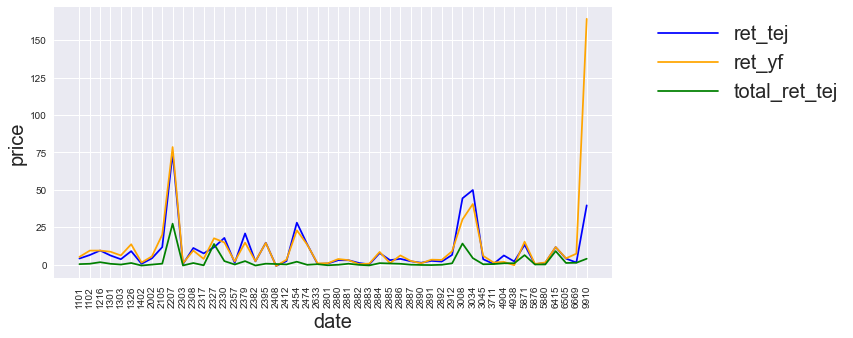

In [38]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot(result.stk_ID,result.ret_tej,label = 'ret_tej',color = 'blue')
plt.plot(result.stk_ID,result.ret_yf,label = 'ret_yf',color = 'orange')
plt.plot(result.stk_ID,result.total_ret_tej,label = 'total_ret_tej',color = 'green')
params = {'legend.fontsize': 14,
          'legend.handlelength': 3,
         'axes.labelsize': 25}
plt.rcParams.update(params)
plt.legend(loc="upper left",fontsize=20,bbox_to_anchor=(1.05, 1))
plt.xlabel('date', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()